### MLP 5: Neural Network
Write your name
* xiaomei Xie
* Lili Hao

In this phase, you will (1) construct neural network models to predict a response variable, (2) evaluate the
model, and (3) write a report about what you find from the analysis. 

(a) Analysis of neural network models with varying number of hidden layers and number of units
(nodes) in the hidden layers. (10 pts)

(b) Analysis of the effects of different activation functions, such as relu, tanh, and logistic functions.
(15 pts)

(c) Analysis of optimal parameters and hyper-parameters, alpha value for regularization parameter,
learning rate for gradient descent, the number of iterations, etc. (15 pts)

For parameters and hyper-parameters, please see the details in Python Scikit. 


### e sure you install the following packages on your machine (No installation needed when you work on Google Colab)

Requires the latest pip

$ pip install --upgrade pip

Current stable release for CPU and GF

$ pip install tensorflow

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"


# Common imports
import numpy as np
import pandas as pd
import os

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn import *



from sklearn.linear_model import Ridge

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



from sklearn.linear_model import LinearRegression
from sklearn import metrics


color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
cmap_light = ListedColormap(color_list_light[0:2])
cmap_bold  = ListedColormap(color_list_bold[0:2])


import warnings


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

warnings.filterwarnings('ignore')

(-5.0, 5.0, -1.2, 1.2)

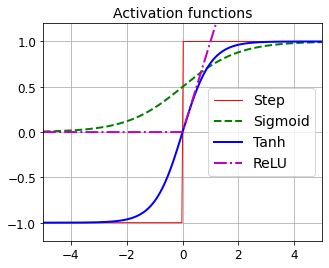

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)


z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
tf.__version__

'2.4.1'

In [6]:
keras.__version__

'2.4.0'

In [7]:
xrange = np.linspace(-2, 2, 200)
print(xrange)

[-2.         -1.9798995  -1.95979899 -1.93969849 -1.91959799 -1.89949749
 -1.87939698 -1.85929648 -1.83919598 -1.81909548 -1.79899497 -1.77889447
 -1.75879397 -1.73869347 -1.71859296 -1.69849246 -1.67839196 -1.65829146
 -1.63819095 -1.61809045 -1.59798995 -1.57788945 -1.55778894 -1.53768844
 -1.51758794 -1.49748744 -1.47738693 -1.45728643 -1.43718593 -1.41708543
 -1.39698492 -1.37688442 -1.35678392 -1.33668342 -1.31658291 -1.29648241
 -1.27638191 -1.25628141 -1.2361809  -1.2160804  -1.1959799  -1.1758794
 -1.15577889 -1.13567839 -1.11557789 -1.09547739 -1.07537688 -1.05527638
 -1.03517588 -1.01507538 -0.99497487 -0.97487437 -0.95477387 -0.93467337
 -0.91457286 -0.89447236 -0.87437186 -0.85427136 -0.83417085 -0.81407035
 -0.79396985 -0.77386935 -0.75376884 -0.73366834 -0.71356784 -0.69346734
 -0.67336683 -0.65326633 -0.63316583 -0.61306533 -0.59296482 -0.57286432
 -0.55276382 -0.53266332 -0.51256281 -0.49246231 -0.47236181 -0.45226131
 -0.4321608  -0.4120603  -0.3919598  -0.3718593  -0.

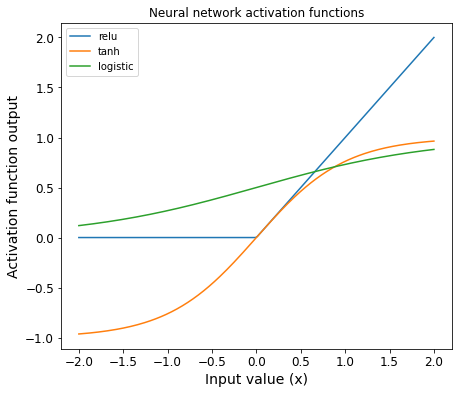

In [8]:
plt.figure(figsize=(7,6))

# three commonly used activation functions, relu, tanh, and logistic
plt.plot(xrange, np.maximum(xrange,0),label='relu')
plt.plot(xrange, np.tanh(xrange),label='tanh')
plt.plot(xrange, 1/(1+np.exp(-xrange)), label='logistic')

plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')

plt.show()

### Utility functions

In [9]:
def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):
###
  #  numClasses = int(np.amax(y)) + 1
    
  #  print(numClasses)
  #  color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
  #  color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
  #  cmap_light = ListedColormap(color_list_light[0:numClasses])
   # cmap_bold  = ListedColormap(color_list_bold[0:numClasses])
###
    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)


In [10]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    #numClasses = np.amax(y) + 1
  #  color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
 #   color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
  #  cmap_light = ListedColormap(color_list_light[0:numClasses])
  #  cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = y[:, 1].min()
    y_max = y[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()
    

In [11]:
def get_KFold_report(X, y):
    X = X.to_numpy()
    y = y.to_numpy()
    kf = KFold(n_splits=10, random_state=None, shuffle=True) # Define the split - into 2 folds 
    tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
    n=1
    for train_index, test_index in kf.split(X):
        print("=========================Kfold" , n , "=======================")
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        tree_clf.fit(X_train, y_train)

        y_pred = tree_clf.predict(X_test)

        # Print classification report
        target_names = TARGET_NAMES
        print(classification_report(y_test, y_pred, target_names=target_names))
        n = n+1

### Neural networks: Classification

### Quick view of data

In [12]:
df = pd.read_csv('../processeddata/new_airlines_Normalized.csv')
df.head(2)

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,...,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Time.Month.level,Rate,Ratio_Rank
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,0.301513,0.270412,0.350472,0.189474,...,0.770892,0.258823,0.185741,0.194317,0.104668,0.260628,0.253219,3.0,0.797538,2.0
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,0.088067,0.093018,0.069295,0.042105,...,0.199003,0.066594,0.067780,0.037010,0.020004,0.064041,0.053621,3.0,0.816993,1.0


In [13]:
df.columns

Index(['Airport.Code', 'Airport.Name', 'Time.Label', 'Time.Month',
       'Time.Month Name', 'Time.Year', '# of Delays.Carrier',
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Statistics.Carriers.Names', 'Carriers.Total', 'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted', 'Flights.On Time',
       'Flights.Total', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather', 'Time.Month.level',
       'Rate', 'Ratio_Rank'],
      dtype='object')

In [14]:
df.shape

(4408, 27)

In [15]:
color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
cmap_light = ListedColormap(color_list_light[0:2])
cmap_bold  = ListedColormap(color_list_bold[0:2])


In [16]:
col = ['# of Delays.Carrier','Time.Month',
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted', 'Flights.On Time',
       'Flights.Total', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather']

In [17]:
dataset = df[col].values

In [18]:
X0 = df[col]
y0 = df["Rate"]

y0 = y0.values.reshape(X0.shape[0], 1)

In [19]:
X0.shape[0]

4408

In [20]:
y0

array([[0.79753826],
       [0.81699346],
       [0.84445517],
       ...,
       [0.67484477],
       [0.85366134],
       [0.79186124]])

In [21]:
#split data into train and test set
X0train, X0test, y0train, y0test = train_test_split(X0, y0, test_size=0.2, random_state=2)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
#standardize the dataset
sc = StandardScaler()
sc.fit(X0train)
X0train = sc.transform(X0train)
X0test = sc.transform(X0test)


In [24]:
print(f"Shape of train set is {X0train.shape}")
print(f"Shape of test set is {X0test.shape}")
print(f"Shape of train label is {y0train.shape}")
print(f"Shape of test labels is {y0test.shape}")

Shape of train set is (3526, 17)
Shape of test set is (882, 17)
Shape of train label is (3526, 1)
Shape of test labels is (882, 1)


In [25]:
#mlp = MLPRegressor(hidden_layer_sizes=[13,8,1], solver='lbfgs').fit(X0train, y0train) activation{‘identity’, ‘logistic’, ‘tanh’, 

In [26]:
# ONE layer hidden layer size
train_scores_means = []
test_scores_means = []
train_preds=[]
test_preds=[]

alpha_sizes = [0, 0.0001, 0.001, 0.01, 0.02, 0.05, 0.075, 0.1,0.2,0.3,0.4, 0.5, 0.6, 0.7,0.8,0.9, 1]

for this_alpha in alpha_sizes:
    mlp_poly = MLPRegressor(hidden_layer_sizes = [10],alpha=this_alpha, solver='lbfgs', activation='relu',
                     random_state = 0).fit(X0train, y0train)
    r2_train = mlp_poly.score(X0train, y0train)
    r2_test = mlp_poly.score(X0test, y0test)
    
    y_pred = mlp_poly.predict(X0train)
    train_preds.append(y_pred)
    train_score_mean = np.sqrt(metrics.mean_squared_error(y0train, y_pred))
    train_scores_means.append(train_score_mean)

    # make predictions on the testing set
    y_test = mlp_poly.predict(X0test)
    test_preds.append(y_test)
    test_score_mean = np.sqrt(metrics.mean_squared_error(y0test, y_test))

    test_scores_means.append(test_score_mean)

In [27]:
train_preds

[array([0.6931327 , 0.71116294, 0.72734741, ..., 0.82008566, 0.84575491,
        0.81651551]),
 array([0.68821082, 0.70561935, 0.72399911, ..., 0.8048672 , 0.84566176,
        0.81613858]),
 array([0.68594892, 0.69819588, 0.7414212 , ..., 0.78618469, 0.84143174,
        0.82657536]),
 array([0.68040822, 0.69958687, 0.72817802, ..., 0.79968287, 0.84728971,
        0.81937858]),
 array([0.69422192, 0.71136258, 0.73069234, ..., 0.82207714, 0.84674291,
        0.81800251]),
 array([0.70165551, 0.71792929, 0.72574939, ..., 0.82635788, 0.8473709 ,
        0.81203251]),
 array([0.69637534, 0.71666975, 0.72996203, ..., 0.81394165, 0.8437383 ,
        0.80394629]),
 array([0.69236012, 0.71126785, 0.71834826, ..., 0.81712572, 0.84610074,
        0.81266971]),
 array([0.69922203, 0.71091067, 0.73047879, ..., 0.81876025, 0.84297256,
        0.80889193]),
 array([0.70105962, 0.71687036, 0.73692988, ..., 0.81591434, 0.84175202,
        0.80497946]),
 array([0.70439974, 0.72375175, 0.7219826 , ..., 0

In [34]:
train_scores_means3 = []
test_scores_means3 = []
train_preds3=[]
test_preds3=[]
lossCurves3 = []

alpha_sizes = [0, 0.0001, 0.001, 0.01, 0.02, 0.05, 0.075, 0.1,0.2,0.3,0.4, 0.5, 0.6, 0.7,0.8,0.9, 1]

for this_alpha in alpha_sizes:
    mlp_poly = MLPRegressor(hidden_layer_sizes = [10,10,10],alpha=this_alpha, solver='sgd',activation='relu',
                     random_state = 0).fit(X0train, y0train)
    r2_train = mlp_poly.score(X0train, y0train)
    r2_test = mlp_poly.score(X0test, y0test)
    
    y_pred = mlp_poly.predict(X0train)
    train_preds3.append(y_pred)
    train_score_mean = np.sqrt(metrics.mean_squared_error(y0train, y_pred))
    train_scores_means3.append(train_score_mean)

    # make predictions on the testing set
    y_test = mlp_poly.predict(X0test)
    test_preds3.append(y_test)
    test_score_mean = np.sqrt(metrics.mean_squared_error(y0test, y_test))

    test_scores_means3.append(test_score_mean)
    #lossCurves3.append(mlp_poly.loss_curve_)
    lossCurves3.append(mlp_poly.loss_curve_)

In [35]:
lossCurves3

[[0.9994156064973457,
  0.551057077642322,
  0.19595746278022377,
  0.051445232463225826,
  0.017801091276008804,
  0.012455359534045455,
  0.011039934503916693,
  0.010094965347162265,
  0.0094137431705826,
  0.008839809430855229,
  0.008378632966891095,
  0.00797666392221432,
  0.007626853273096937,
  0.007331889953965667,
  0.007043228856724001,
  0.006772193564864537,
  0.006527894760963341,
  0.00631029451377601,
  0.006110956908397671,
  0.005917402121376296,
  0.005752927910194609,
  0.005596881059310857,
  0.00544752976854346,
  0.005314740573361789,
  0.005188070832586523,
  0.005073906046623459,
  0.004972741941231171,
  0.004871010560474822,
  0.004781809659252485,
  0.004697171283830762,
  0.004619757606573725,
  0.0045445484778334645,
  0.004476997586942399,
  0.004410161140651853,
  0.004351362866611343,
  0.004292617462540693,
  0.004239763722158913,
  0.004187579529640917,
  0.00413995088818424],
 [0.9994243332850457,
  0.5510657554858682,
  0.1959661626980226,
  0.0514

In [36]:
train_scores_means

[0.011358255732856206,
 0.013029100514994361,
 0.015922524162776272,
 0.013149219046907483,
 0.011202252649699821,
 0.010364751830439462,
 0.010573979569199672,
 0.012738689546843165,
 0.010020063571532425,
 0.008816786532412553,
 0.008608247167579628,
 0.008829243672649072,
 0.00800993110058298,
 0.00907776596345046,
 0.009073829531876033,
 0.008012467178580921,
 0.00861447388213062]

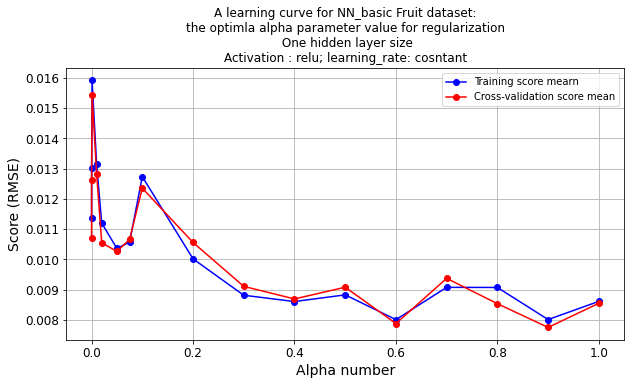

In [38]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.set_title('A learning curve for NN_basic Fruit dataset:\nthe optimla alpha parameter value for regularization\n One hidden layer size\nActivation : relu; learning_rate: cosntant')
ax.set_xlabel("Alpha number")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(alpha_sizes, train_scores_means, 'o-', color="b", label="Training score mearn")
ax.plot(alpha_sizes, test_scores_means, 'o-', color="r", label="Cross-validation score mean")
#ax.plot(alpha_sizes, lossCurves3, 'o-', color="g", label="Loss Curver")


ax.legend(loc="best")

plt.show()

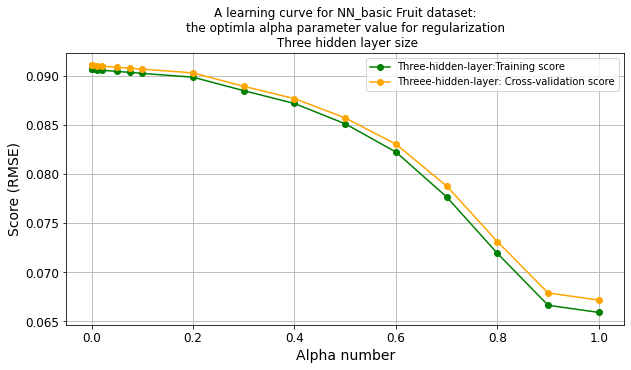

In [39]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.set_title('A learning curve for NN_basic Fruit dataset:\nthe optimla alpha parameter value for regularization\n Three hidden layer size')
ax.set_xlabel("Alpha number")
ax.set_ylabel("Score (RMSE)")
ax.grid()


ax.plot(alpha_sizes, train_scores_means3, 'o-', color="g", label="Three-hidden-layer:Training score")
ax.plot(alpha_sizes, test_scores_means3, 'o-', color="orange", label="Threee-hidden-layer: Cross-validation score")

ax.legend(loc="best")

plt.show()

In [40]:
# Create Neural Net MLP regressor 
# Explore settings logarithmically (0.1, 0.01, 0.001, 0.00001)
alpha_sizes = [0.1, 0.01, 0.001, 0.00001]
lossCurve = []
for this_alpha in alpha_sizes:
    model = MLPRegressor(
        # try some layer & node sizes
        hidden_layer_sizes=(10), 
        # find a learning rate?
        learning_rate_init=.001,
        # activation functions (relu, tanh, identity)
        activation='relu',
        alpha=this_alpha,
        max_iter=2000
    );



    # Train it (where X_train is your feature matrix & Y_train is a vector with desired target values for each record)
    model.fit(X0train,y0train)
    lossCurve.append(model.loss_curve_)

    

### Three hidden layer size 

In [41]:
# Create Neural Net MLP regressor 
# Explore settings logarithmically (0.1, 0.01, 0.001, 0.00001)
alpha_sizes = [0.1, 0.01, 0.001, 0.00001]
lossCurve3 = []
for this_alpha in alpha_sizes:
    model = MLPRegressor(
        # try some layer & node sizes
        hidden_layer_sizes=(10), 
        # find a learning rate?
        learning_rate_init=.001,
        # activation functions (relu, tanh, identity)
        activation='relu',
        max_iter=2000
    );



    # Train it (where X_train is your feature matrix & Y_train is a vector with desired target values for each record)
    model.fit(X0train,y0train)
    lossCurve3.append(model.loss_curve_)


## Plot the 'loss_curve_' protery on model to see how well we are learning over the iterations
    # Use Pandas built in plot method on DataFrame to creat plot in one line of code


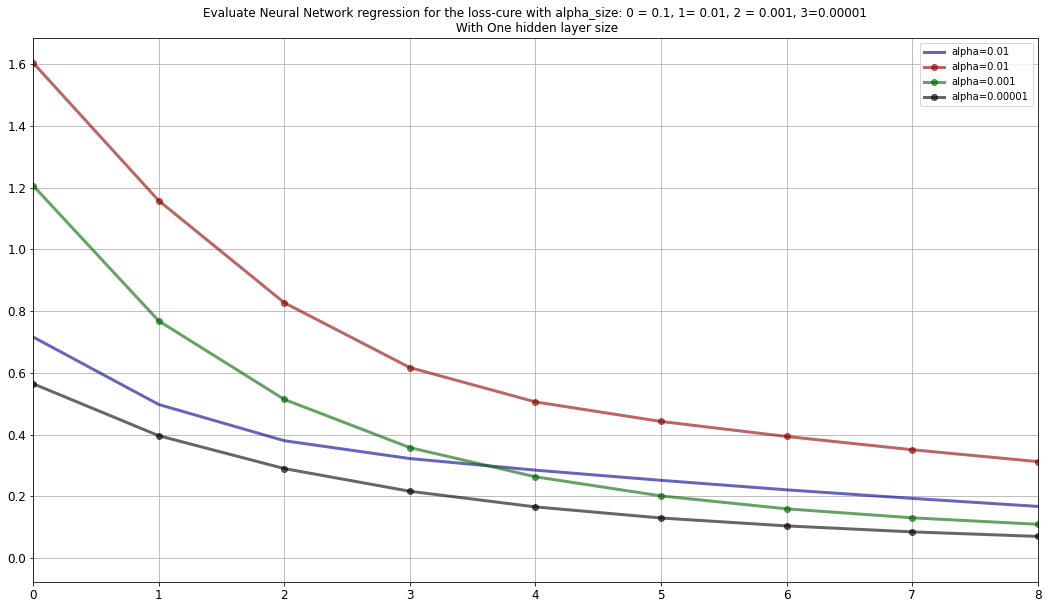

In [42]:
# Plotting
plt.figure(figsize=(18, 10))
plt.plot(lossCurve[0], label= r'alpha=0.01' , color="darkblue", alpha=0.6, linewidth=3)
plt.plot(lossCurve[1], 'bo-', label=r'alpha=0.01', color="darkred", alpha=0.6, linewidth=3)
plt.plot(lossCurve[2], 'bo-', label=r'alpha=0.001', color="darkgreen", alpha=0.6, linewidth=3)
plt.plot(lossCurve[3], 'bo-', label=r'alpha=0.00001', color="black", alpha=0.6, linewidth=3)
#plt.xlabel('alpha value'); plt.ylabel(r'$R^2$')
plt.xlim(0, 8)
plt.title('Evaluate Neural Network regression for the loss-cure with alpha_size: 0 = 0.1, 1= 0.01, 2 = 0.001, 3=0.00001\n With One hidden layer size')
plt.legend(loc='best')
plt.grid()  

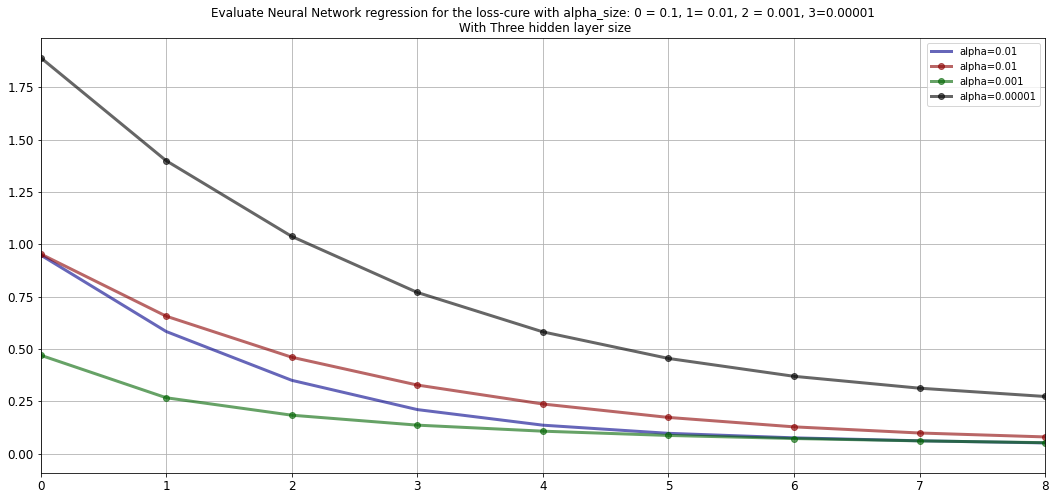

In [43]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(lossCurve3[0], label= r'alpha=0.01' , color="darkblue", alpha=0.6, linewidth=3)
plt.plot(lossCurve3[1], 'bo-', label=r'alpha=0.01', color="darkred", alpha=0.6, linewidth=3)
plt.plot(lossCurve3[2], 'bo-', label=r'alpha=0.001', color="darkgreen", alpha=0.6, linewidth=3)
plt.plot(lossCurve3[3], 'bo-', label=r'alpha=0.00001', color="black", alpha=0.6, linewidth=3)
#plt.xlabel('alpha value'); plt.ylabel(r'$R^2$')
plt.xlim(0, 8)
plt.title('Evaluate Neural Network regression for the loss-cure with alpha_size: 0 = 0.1, 1= 0.01, 2 = 0.001, 3=0.00001\n With Three hidden layer size')
plt.legend(loc='best')
plt.grid()  

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
y0 = df["Ratio_Rank"]

#y0 = y0.values.reshape(X0.shape[0], 1)
print(y0)

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4403    1.0
4404    1.0
4405    3.0
4406    1.0
4407    2.0
Name: Ratio_Rank, Length: 4408, dtype: float64


In [ ]:
#split data into train and test set
X0train, X0test, y0train, y0test = train_test_split(X0, y0, test_size=0.2, random_state=2)

In [45]:
print(X0train.shape)
print(y0train.shape)
print(y0.shape)

(3526, 17)
(3526, 1)
(4408,)


In [46]:
print(X0test.shape)
print(y0test.shape)

(882, 17)
(882, 1)


In [47]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)   # 3 hidden layer

In [ ]:
X0.columns

In [48]:
y_pred = mlp_poly.predict(X0train)
print(y_pred.shape)

(3526,)


In [49]:
from sklearn.metrics import classification_report

In [50]:
target_names = ['Class-1', 'Class-2', 'Class-3']

result_metrics = classification_report(y0train, y_pred)

print(result_metrics)

ValueError: continuous is not supported

In [51]:
y_pred = mlp_poly.predict(X0train)
print(y_pred)

[0.78118209 0.71692331 0.81126226 ... 0.70734646 0.81720102 0.74483347]


In [52]:
classes = ['# of Delays.Carrier', 'Time.Month', '# of Delays.Late Aircraft',
       '# of Delays.National Aviation System', '# of Delays.Security',
       '# of Delays.Weather', 'Flights.Cancelled', 'Flights.Delayed',
       'Flights.Diverted', 'Flights.On Time', 'Flights.Total',
       'Minutes Delayed.Carrier', 'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather']

#labels = {1:'High', 2: 'Median', 3:'Low'}
y_pred = mlp_poly.predict(X0train)

confusion_mat = confusion_matrix(y0train, y_pred)    

print(confusion_mat)
#plot_confusion_matrix(confusion_mat, 4)

ValueError: continuous is not supported

In [53]:
cm =confusion_matrix(mlp, labels= {1:'High', 2: 'Median', 3:'Low'}, cmap=plt.cm.Blues,  X0test, y0test, normalize = normalize)




# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X0test, y0test)

# How did we do?
cm.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-53-534fb94a130c>, line 1)

In [54]:
df.plot(subplots=True, layout=(2, 3), figsize=(6, 6), sharex=False);

ValueError: Layout of 2x3 must be larger than required size 22

<Figure size 432x432 with 0 Axes>

# Attribute by using # of Delays.Weather & Flights Delayed.

In [ ]:
X = dataset[:,5:7]
print(type(X))

In [ ]:
print(X)

In [ ]:
type(X)

In [ ]:
y = df["Rate"].values
type(y)


In [ ]:
int(np.amax(y))

In [ ]:

print(type(X))

print(type(y))

In [ ]:
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter( X[:,0], X[:,1],c=y,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

## Apply neural network with 2 hidden layers with varying number of units (10, 20, 50, 100). 

  * MLPRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=[50,50], solver='lbfgs').fit(X_train, y_train)

In [ ]:
from sklearn.neural_network import MLPClassifier

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

for units, axis in zip([1, 100, 400, 600], subaxes):
    # model training with one hidden layer
    nnclf =MLPRegressor(hidden_layer_sizes = [units], solver = 'lbfgs', random_state=0).fit(X_train, y_train)  
    
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

In [ ]:
plot_class_regions_for_classifier(mlp, X_train, y_train, X_test, y_test,
                                 'Dataset 1: Neural net classifier, 2 layers, 10/10 units')

### Apply neural network with 2 hidden layers with varying number of units (10, 20, 50, 100).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# model training with two hidden layers
nnclf = MLPRegressor(hidden_layer_sizes = [10,20,50,100], solver='lbfgs',
                     random_state = 0).fit(X_train, y_train)
